<a href="https://colab.research.google.com/github/JonusGhost/Proyect_one_kraken/blob/Master/GeoPandas_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar GeoPandas

In [ ]:
!pip install geopandas

# Importacion de Bibliotecas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Paso 1: Cargar la tabla de Wikipedia con datos de población de México

In [ ]:
mx_info = pd.read_html("https://en.wikipedia.org/wiki/List_of_states_of_Mexico")
mx_pop = mx_info[0]
mxpop = mx_pop.iloc[:, [0, 3, 6]]
# Renombrar las columnas para hacerlas más descriptivas
mxpop = mxpop.rename(columns={
    "State": "Estado",
    "Capital": "Capital",
    "Population (February 2023; 127,104,000 total)[7]": "Poblacion"
})
# Limpiar nombres de estados eliminando el texto entre corchetes
mxpop["Estado"] = mxpop["Estado"].str.replace(r'\[.*?\]', '', regex=True).str.strip()
# Unificar nombres de estados para que coincidan con el shapefile
# Cambiamos "Mexico City" por "Distrito Federal" en mxpop
mxpop["Estado"] = mxpop["Estado"].replace({"Mexico City": "Distrito Federal"})
print(mxpop.head(32))

                 Estado                    Capital  Poblacion
0        Aguascalientes             Aguascalientes    1465000
1       Baja California                   Mexicali    3822000
2   Baja California Sur                     La Paz     759000
3              Campeche  San Francisco de Campeche     965000
4               Chiapas           Tuxtla Gutiérrez    5602000
5             Chihuahua                  Chihuahua    3806000
6              Coahuila                   Saltillo    3189000
7                Colima                     Colima     830000
8               Durango        Victoria de Durango    1846000
9            Guanajuato                 Guanajuato    6205000
10             Guerrero  Chilpancingo de los Bravo    3556000
11              Hidalgo            Pachuca de Soto    3115000
12              Jalisco                Guadalajara    8400000
13               México            Toluca de Lerdo   17102000
14     Distrito Federal                Mexico City    9305000
15      

# Paso 2: Cargar el shapefile de México usando geopandas (archivo .shp)

Paso 2.1: Descargar el archivo .shp en la pagina de GADM (Global Administrative Areas), ya que este proporciona datos geoespaciales de límites administrativos para países de todo el mundo. Para este ejemplo usaremos a Mexico:
- Ve a GADM.
- Selecciona "Mexico" en la lista de países.
- Descarga el archivo en formato shapefile (SHP).
- Descomprime el archivo .zip, que contiene varios archivos, incluyendo .shp, .shx, .dbf, necesarios para trabajar con geopandas.

In [ ]:
# Limpiar nombres de estados en la tabla de población
mxpop["Estado"] = mxpop["Estado"].str.strip().str.lower()

# Cargar el shapefile de México usando geopandas (reemplaza la ruta con la ubicación correcta)
gdf_mexico = gpd.read_file('/content/GADM_Mexico/gadm41_MEX_1.shp')  # Usa el nivel 1 para divisiones por estado
#print(gdf_mexico.head(32))

# Asegurarnos de que los nombres de los estados en el shapefile están limpios
gdf_mexico = gdf_mexico.rename(columns={"NAME_1": "Estado"})  # Cambia 'NAME_1' por el nombre adecuado si es diferente
gdf_mexico["Estado"] = gdf_mexico["Estado"].str.strip().str.lower()

# Paso de diagnóstico: Verificar coincidencias entre nombres de estados
estados_shapefile = set(gdf_mexico["Estado"].unique())
estados_poblacion = set(mxpop["Estado"].unique())

print("Estados en shapefile pero no en mxpop:", estados_shapefile - estados_poblacion)
print("Estados en mxpop pero no en shapefile:", estados_poblacion - estados_shapefile)

# Realizar la unión de los datos de población con el shapefile
gdf_mexico = gdf_mexico.merge(mxpop, on="Estado", how="left")

Estados en shapefile pero no en mxpop: set()
Estados en mxpop pero no en shapefile: set()


# Paso 3: Diagnóstico adicional para verificar que la unión fue exitosa

In [ ]:
print("Verificación de la unión:")
print(gdf_mexico[["Estado", "Poblacion"]].head(32))
print(gdf_mexico["Poblacion"].isnull().sum(), "estados sin datos de población después de la unión")

Verificación de la unión:
                 Estado  Poblacion
0        aguascalientes    1465000
1       baja california    3822000
2   baja california sur     759000
3              campeche     965000
4               chiapas    5602000
5             chihuahua    3806000
6              coahuila    3189000
7                colima     830000
8      distrito federal    9305000
9               durango    1846000
10           guanajuato    6205000
11             guerrero    3556000
12              hidalgo    3115000
13              jalisco    8400000
14               méxico   17102000
15            michoacán    4736000
16              morelos    2016000
17              nayarit    1274000
18           nuevo león    5846000
19               oaxaca    4096000
20               puebla    6535000
21            querétaro    2404000
22         quintana roo    1895000
23      san luis potosí    2815000
24              sinaloa    3015000
25               sonora    3006000
26              tabasco    24

# Paso 4: Visualización del mapa con colores según la población

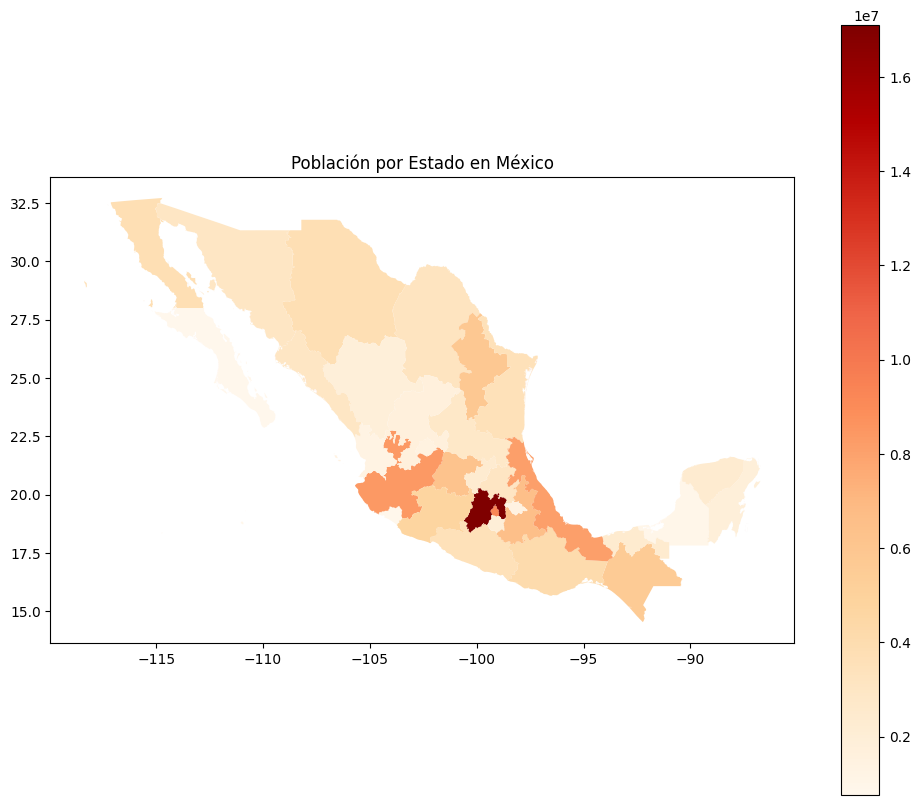

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_mexico.plot(column='Poblacion', cmap='OrRd', legend=True, ax=ax)
ax.set_title("Población por Estado en México")
plt.show()